In [215]:
# pip install github3.py command for install github3
# execute pip install github3.py command from the the command window/terminal
import github3, json
import os
#import cPickle as pickle
import pandas as pd                                    # panda's nickname is pd
from fbprophet import Prophet
import numpy as np                                     # numpy as np
from pandas import DataFrame, Series                   # for convenience
import matplotlib.pyplot as plt
%matplotlib inline

In [216]:
# Get an API key for GitHub and set it as GITHUB_TOKEN
# Here is the URL to generate your GITHUB_TOKEN
# https://help.github.com/articles/creating-an-access-token-for-command-line-use/

GITHUB_TOKEN = 'd14e9f79e44f66bdc12e09bee463a3bd1225c98f'
ORG = 'SPM587SP19'                     
REPO = 'SCM587SP19'
FILENAME_ISSUES = ORG + '_issues.json'

In [217]:
gh = github3.login(token=GITHUB_TOKEN)

f = open(FILENAME_ISSUES, 'w')
for issue in gh.search_issues('type:issues repo:SPM587SP19/SCM587SP19'):          
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)
            data['Issues'] = 1
            data['created_at']= current_issue["created_at"][0:10]                 
            if current_issue["closed_at"] == None:
                data['closed_at']= current_issue["closed_at"]
            else:
                data['closed_at']= current_issue["closed_at"][0:10]               
            data['State'] = current_issue["state"]                                
            out=json.dumps(data)                                                  
            f.write(out+ '\n')
f.close()

INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:JSON was returned


In [218]:
import json
listOfIssues = [json.loads(line) for line in open('SPM587SP19_issues.json')]
Issuesdf = DataFrame(listOfIssues)
Issuesdf.head()

,Issues,State,closed_at,created_at
0,1,open,None,2019-04-21
1,1,open,None,2019-04-21
2,1,open,None,2019-04-21
3,1,open,None,2019-04-21
4,1,open,None,2019-04-21


In [219]:
Issuesdf['created_at'] = pd.to_datetime(Issuesdf['created_at'], errors='coerce')
i = Issuesdf.groupby(Issuesdf['created_at'].dt.date).sum().reset_index()
i

,created_at,Issues
0,2019-03-24,1
1,2019-03-29,2
2,2019-03-30,9
3,2019-03-31,42
4,2019-04-01,12
5,2019-04-02,35
6,2019-04-03,37
7,2019-04-04,10
8,2019-04-05,27
9,2019-04-06,3


In [220]:
Issuesdf.dtypes

Issues                 int64
State                 object
closed_at             object
created_at    datetime64[ns]
dtype: object

In [221]:
i= i.rename(index=str, columns={'created_at': 'ds',
                        'Issues': 'y'})
#pull_dataframe_created = pull_dataframe_created.rename(index=str, columns={"created_at": "ds", "PullCount": "y"})
i = i[['ds', 'y']]
i.head()

,ds,y
0,2019-03-24,1
1,2019-03-29,2
2,2019-03-30,9
3,2019-03-31,42
4,2019-04-01,12


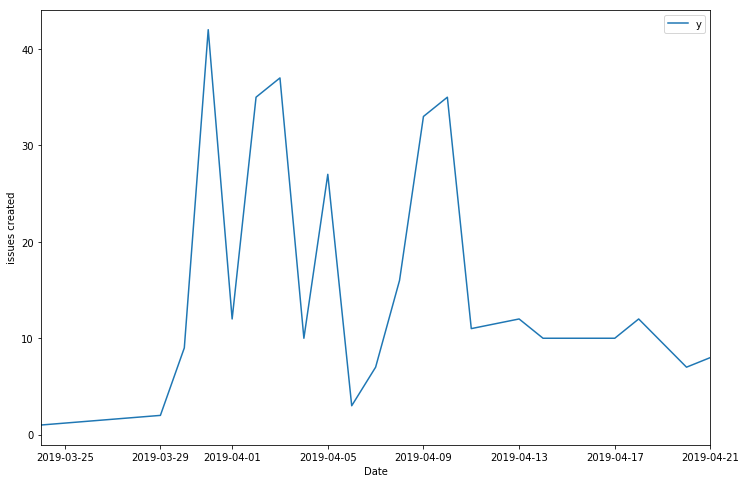

In [222]:
plot1 = i.set_index('ds').plot(figsize=(12, 8))
plot1.set_ylabel('issues created')
plot1.set_xlabel('Date')
plt.show()

#plot2 = i.set_index('ds').plot(figsize=(12, 8))
#plot2.set_ylabel('PR closed')
#plot2.set_xlabel('Date')

#plt.show()

## Plot the created issues forecast by calling the Prophet.plot method and passing in your forecast dataframe.

In [223]:
i_create = Prophet()
i_create.fit(i)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 17.0.


In [224]:
future = i_create.make_future_dataframe(periods=365)
future.tail()

,ds
383,2020-04-16
384,2020-04-17
385,2020-04-18
386,2020-04-19
387,2020-04-20


In [225]:
forecast = i_create.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
383,2020-04-16,129.796000,115.622052,145.430735
384,2020-04-17,134.577712,119.260171,149.027585
385,2020-04-18,127.618996,113.944261,141.823630
386,2020-04-19,134.247357,119.875811,150.254677
387,2020-04-20,133.273077,118.851973,148.051315


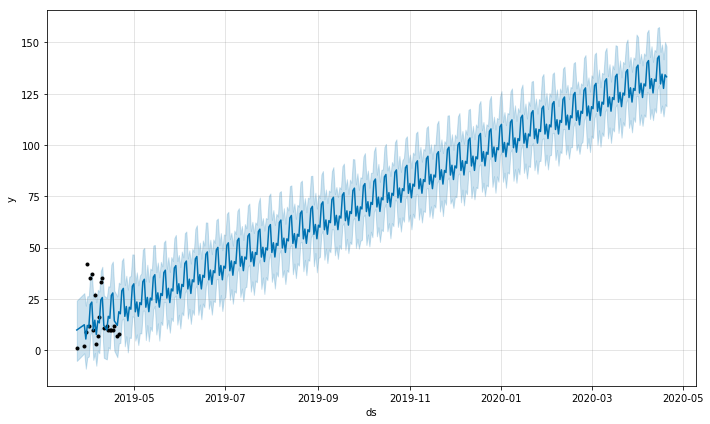

In [226]:
fig1 = i_create.plot(forecast)

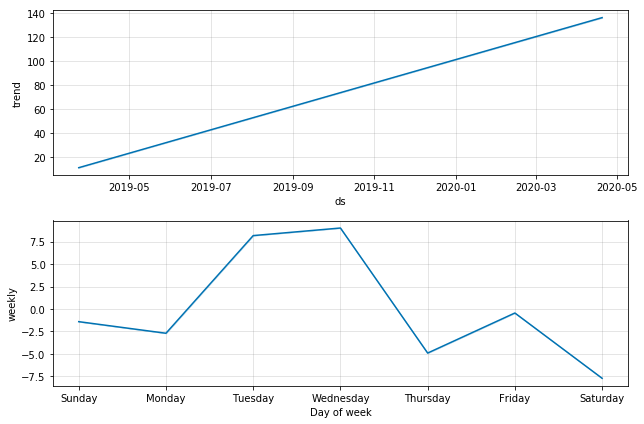

In [227]:
fig1 = i_create.plot_components(forecast)

## Plot the closed issues forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

In [228]:
Issuesdf['closed_at'] = pd.to_datetime(Issuesdf['closed_at'], errors='coerce')
iclosed = Issuesdf.groupby(Issuesdf['closed_at'].dt.date).sum().reset_index()
iclosed

,closed_at,Issues
0,2019-03-31,25
1,2019-04-01,12
2,2019-04-02,34
3,2019-04-03,34
4,2019-04-04,14
5,2019-04-05,15
6,2019-04-06,3
7,2019-04-07,14
8,2019-04-08,16
9,2019-04-09,28


In [229]:
iclosed = iclosed.rename(index=str, columns={"closed_at": "ds", "Issues": "y"})
iclosed = iclosed[['ds', 'y']]
iclosed

,ds,y
0,2019-03-31,25
1,2019-04-01,12
2,2019-04-02,34
3,2019-04-03,34
4,2019-04-04,14
5,2019-04-05,15
6,2019-04-06,3
7,2019-04-07,14
8,2019-04-08,16
9,2019-04-09,28


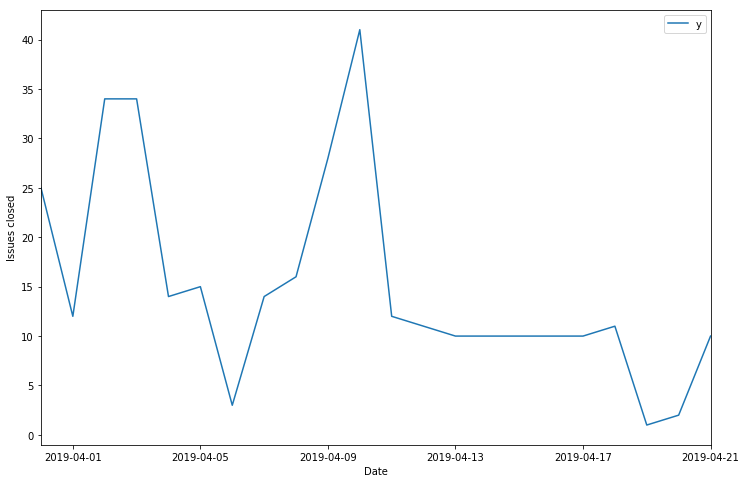

In [230]:
plot2 = iclosed.set_index('ds').plot(figsize=(12, 8))
plot2.set_ylabel('Issues closed')
plot2.set_xlabel('Date')

plt.show()


In [231]:
i1 = Prophet()
i1.fit(iclosed)
future = i1.make_future_dataframe(periods=30)
future.tail()


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 15.0.


,ds
46,2019-05-17
47,2019-05-18
48,2019-05-19
49,2019-05-20
50,2019-05-21


In [232]:
forecast = i1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
46,2019-05-17,-17.435478,-24.269031,-10.810457
47,2019-05-18,-21.515447,-28.288494,-15.030637
48,2019-05-19,-14.567963,-21.338006,-7.463307
49,2019-05-20,-19.465028,-25.457858,-12.831847
50,2019-05-21,-8.151188,-14.592439,-1.075547


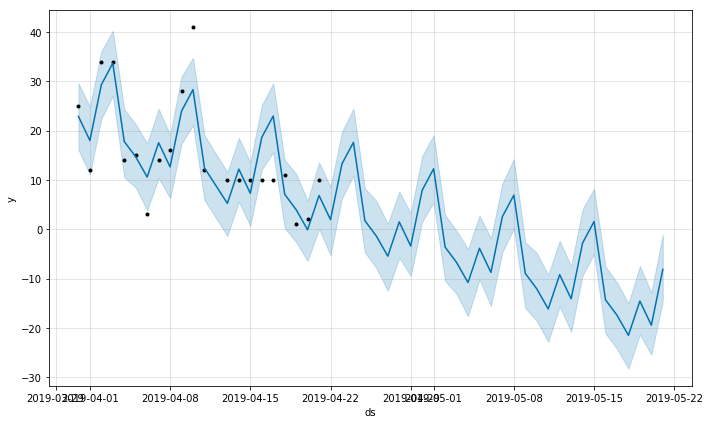

In [233]:
fig2 = i1.plot(forecast)
#fig1 = i_create.plot(forecast)

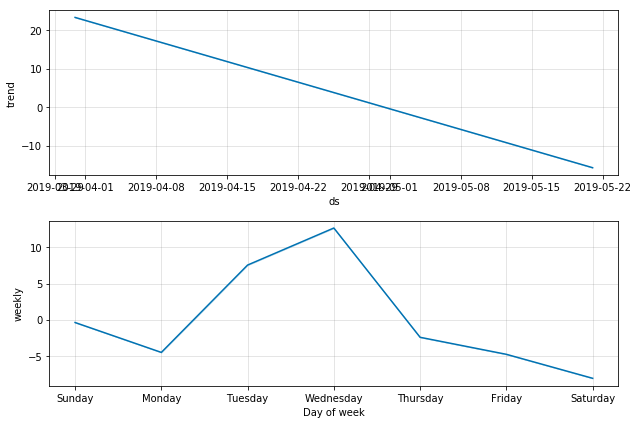

In [234]:
fig2 = i1.plot_components(forecast)